In [1]:
## Python basics for novice data scientists, supported by Wagatsuma Lab@Kyutech 
#
# The MIT License (MIT): Copyright (c) 2020 Hiroaki Wagatsuma and Wagatsuma Lab@Kyutech
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE. */
#
# # @Time    : 2025-4-19 
# # @Author  : Hiroaki Wagatsuma
# # @Site    : https://github.com/hirowgit/2A_python_basic_course
# # @IDE     : Python 3.9.16 (main, Dec  7 2022, 10:15:43) [Clang 14.0.0 (clang-1400.0.29.202)] on darwin
# # @File    : lec5_step01c.py 

In [2]:
# module test: if you have an error when you run this code, 
# you need to check the installation status of those modules

import math 
import sys 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib.cm as cm
import matplotlib as mp
import tkinter as tk

from scipy import interpolate

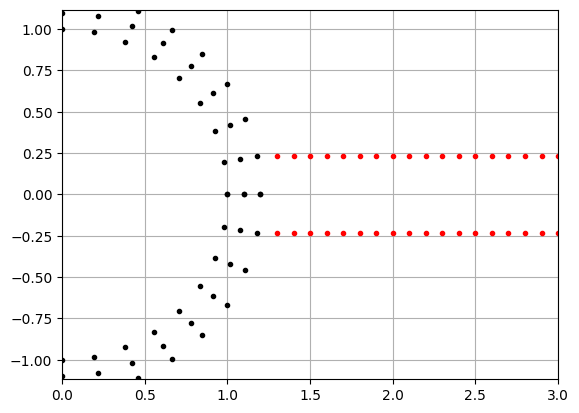

In [3]:
rotA=lambda th: np.array([[np.cos(th), -np.sin(th)],[np.sin(th), np.cos(th)]])

# roadLen=10
roadLen=5
NofSeg=8
NoofConn=4

NofD=NofSeg*4+1
datD=np.linspace(0, 2*np.pi, num=NofD)

NofD=NofSeg*NoofConn+1


figNum=12
fig = plt.figure(figNum)
fig.clear()
plt.cla()
# maxR=[-100,100]
radDinit=1
radDw=0.1
radD=np.linspace(radDinit,radDinit+radDw*(3-1),3)

C0=np.arange(1,32,8)-1
Conn=np.flipud(np.vstack([C0+1,np.roll(C0+NofSeg-1,1)]))
connRoad=np.arange(max(radD),roadLen,radDw)+radDw

xD=np.tile(radD,[len(datD),1])*np.tile(np.cos(datD),[len(radD),1]).T
yD=np.tile(radD,[len(datD),1])*np.tile(np.sin(datD),[len(radD),1]).T
plt.plot(xD,yD,'k.',linewidth=2)

ConnFlat=np.reshape(Conn[:],[1,8])[0]
xD2=np.tile(radD,[len(datD[ConnFlat]),1])*np.tile(np.cos(datD[ConnFlat]),[len(radD),1]).T
yD2=np.tile(radD,[len(datD[ConnFlat]),1])*np.tile(np.sin(datD[ConnFlat]),[len(radD),1]).T

radD2=connRoad

key=np.where(np.diff(datD[Conn[:]],axis=0)<0)[1]
mAng=np.mean(datD[Conn[:]],axis=0)
mAng[key]=mAng[key] % np.pi
mAng2=np.tile(mAng,[1,2])

xD2r=np.tile(radD2,[len(datD[ConnFlat]),1])*np.tile(np.cos(mAng2),[len(radD2),1]).T
yD2r=np.tile(radD2,[len(datD[ConnFlat]),1])*np.tile(np.sin(mAng2),[len(radD2),1]).T

unitVec=np.array([np.cos(mAng),np.sin(mAng)])
# display(unitVec)

paramW=radD[-1]*np.sin(datD[1])

Lane1shift=np.dot(rotA(np.pi/2),paramW*unitVec)
Lane2shift=np.dot(rotA(-np.pi/2),paramW*unitVec)

xShift=np.hstack([Lane1shift[0],Lane2shift[0]])
yShift=np.hstack([Lane1shift[1],Lane2shift[1]])

xShiftFull=np.tile(xShift,[len(radD2),1])
yShiftFull=np.tile(yShift,[len(radD2),1])

xD2r2=xD2r+xShiftFull.T
yD2r2=yD2r+yShiftFull.T

plt.plot(xD2r2,yD2r2,'r.',linewidth=2)


plt.grid()
plt.axis('equal')
plt.xlim(0,3)
plt.ylim(-1,1)

plt.show()

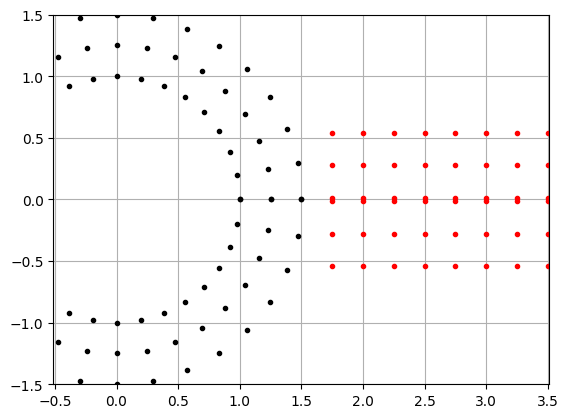

In [7]:
rotA=lambda th: np.array([[np.cos(th), -np.sin(th)],[np.sin(th), np.cos(th)]])

# roadLen=10
roadLen=5
NofSeg=8
NoofConn=4

NofD=NofSeg*4+1
datD=np.linspace(0, 2*np.pi, num=NofD)

NofD=NofSeg*NoofConn+1

figNum=13
fig = plt.figure(figNum)
fig.clear()
plt.cla()
# maxR=[-100,100]
radDinit=1
radDw=0.25
radD=np.linspace(radDinit,radDinit+radDw*(3-1),3)

C0=np.arange(1,32,8)-1
Conn=np.flipud(np.vstack([C0+1,np.roll(C0+NofSeg-1,1)]))
connRoad=np.arange(max(radD),roadLen,radDw)+radDw

paramW=radD[-1]*np.sin(datD[1])

xD=np.tile(radD,[len(datD),1])*np.tile(np.cos(datD),[len(radD),1]).T
yD=np.tile(radD,[len(datD),1])*np.tile(np.sin(datD),[len(radD),1]).T
plt.plot(xD,yD,'k.',linewidth=2)

ConnFlat=np.reshape(Conn[:],[1,8])[0]
xD2=np.tile(radD,[len(datD[ConnFlat]),1])*np.tile(np.cos(datD[ConnFlat]),[len(radD),1]).T
yD2=np.tile(radD,[len(datD[ConnFlat]),1])*np.tile(np.sin(datD[ConnFlat]),[len(radD),1]).T

radD2=connRoad

key=np.where(np.diff(datD[Conn[:]],axis=0)<0)[1]
mAng=np.mean(datD[Conn[:]],axis=0)
mAng[key]=mAng[key] % np.pi
mAng2=np.tile(mAng,[1,2])

xD2r=np.tile(radD2,[len(datD[ConnFlat]),1])*np.tile(np.cos(mAng2),[len(radD2),1]).T
yD2r=np.tile(radD2,[len(datD[ConnFlat]),1])*np.tile(np.sin(mAng2),[len(radD2),1]).T

unitVec=np.array([np.cos(mAng),np.sin(mAng)])

# plt.plot(xD2r,yD2r,'r.',linewidth=2)
xD2rS=[]
yD2rS=[]
for kk in range(3):
    Lane1shift=np.dot(rotA(np.pi/2),(kk*0.9+0.05)*paramW*unitVec)
    Lane2shift=np.dot(rotA(-np.pi/2),(kk*0.9+0.05)*paramW*unitVec)
    
    xShift=np.hstack([Lane1shift[0],Lane2shift[0]])
    yShift=np.hstack([Lane1shift[1],Lane2shift[1]])
    
    xShiftFull=np.tile(xShift,[len(radD2),1])
    yShiftFull=np.tile(yShift,[len(radD2),1])
    
    xD2rS=xD2rS+[xD2r+xShiftFull.T]
    yD2rS=yD2rS+[yD2r+yShiftFull.T]

    plt.plot(xD2rS[kk],yD2rS[kk],'r.',linewidth=2)

plt.grid()
plt.axis('equal')
plt.xlim(0,3)
plt.ylim(-1.5,1.5)

plt.show()

In [8]:
pBase=3
arcKey=np.tile(C0+2,[pBase,1]).T+np.tile(range(pBase),[len(C0),1])
arcKey2=np.fliplr(arcKey)

xFull=[np.hstack([xD.T[i,arcKey2],xD2rS[i][:4,:pBase]]) for i in range(3)]
yFull=[np.hstack([yD.T[i,arcKey2],yD2rS[i][:4,:pBase]]) for i in range(3)]


In [11]:
arcKey,arcKey2

(array([[ 2,  3,  4],
        [10, 11, 12],
        [18, 19, 20],
        [26, 27, 28]]),
 array([[ 4,  3,  2],
        [12, 11, 10],
        [20, 19, 18],
        [28, 27, 26]]))

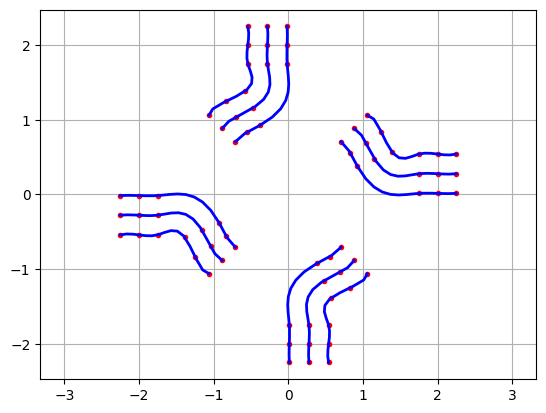

In [25]:
figNum=14
fig = plt.figure(figNum)
fig.clear()
plt.cla()

for j in range(3):
    xS=xFull[j]
    yS=yFull[j]
    
    fcF = lambda x,y: interpolate.interp1d(x, y,kind='cubic') 
    xd= [np.linspace(np.min(x),np.max(x),15) for x,y in zip(xS,yS)]
    yd= [np.linspace(np.min(y),np.max(y),15) for x,y in zip(xS,yS)]

    xJout,yJout=[],[]
    for i in range(4):
        if i % 2 ==0:
            xJout.append(xd[i]),yJout.append(fcF(xS[i],yS[i])(xd[i]))
        else:
            xJout.append(fcF(yS[i],xS[i])(yd[i])),yJout.append(yd[i])

    for i in range(4):
        plt.plot(xS[i],yS[i],'r.',linewidth=2)
        plt.plot(xJout[i],yJout[i],'b-',linewidth=2)
        

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

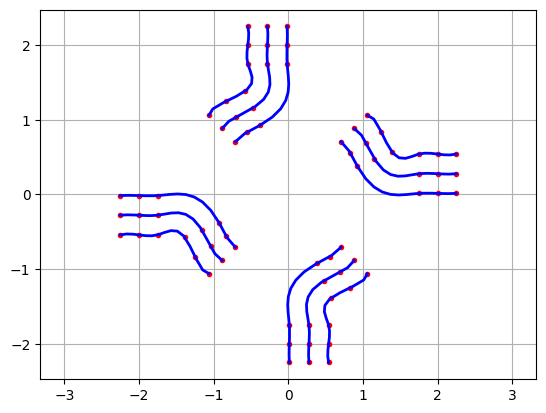

In [50]:
figNum=15
fig = plt.figure(figNum)
fig.clear()
plt.cla()

xJoutFull,yJoutFull=[],[]
for j in range(3):
    xS=xFull[j]
    yS=yFull[j]
    
    fcF = lambda x,y: interpolate.interp1d(x, y,kind='cubic') 
    xd= [np.linspace(np.min(x),np.max(x),15) for x,y in zip(xS,yS)]
    yd= [np.linspace(np.min(y),np.max(y),15) for x,y in zip(xS,yS)]

    xJout,yJout=[],[]
    for i in range(4):
        if i % 2 ==0:
            xJout.append(xd[i]),yJout.append(fcF(xS[i],yS[i])(xd[i]))
        else:
            xJout.append(fcF(yS[i],xS[i])(yd[i])),yJout.append(yd[i])
    
    xJoutFull.append(xJout),yJoutFull.append(yJout)

for j in range(3):
    for i in range(4):
        plt.plot(xFull[j][i],yFull[j][i],'r.',linewidth=2)
        plt.plot(xJoutFull[j][i],yJoutFull[j][i],'b-',linewidth=2)
        

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

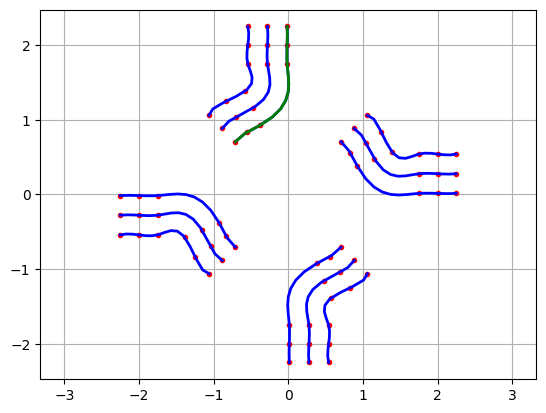

In [89]:
figNum=16
fig = plt.figure(figNum)
fig.clear()
plt.cla()

xFullnew,yFullnew=[],[]
xJoutFull,yJoutFull=[],[]
for j in range(3):
    xS,yS=xFull[j],yFull[j]

    if j==0:
        xFullnew,yFullnew=xS,yS
    else:
        xFullnew=np.vstack([xFullnew,xS])
        yFullnew=np.vstack([yFullnew,yS])
    
    fcF = lambda x,y: interpolate.interp1d(x, y,kind='cubic') 
    xd= [np.linspace(np.min(x),np.max(x),15) for x,y in zip(xS,yS)]
    yd= [np.linspace(np.min(y),np.max(y),15) for x,y in zip(xS,yS)]

    xJout,yJout=[],[]
    for i in range(4):
        if i % 2 ==0:
            xJout.append(xd[i]),yJout.append(fcF(xS[i],yS[i])(xd[i]))
        else:
            xJout.append(fcF(yS[i],xS[i])(yd[i])),yJout.append(yd[i])
    
    xJout_np,yJout_np=np.array(xJout),np.array(yJout)
    if j==0:
        xJoutFull,yJoutFull=xJout_np,yJout_np
    else:
        xJoutFull=np.vstack([xJoutFull,xJout_np])
        yJoutFull=np.vstack([yJoutFull,yJout_np])

plt.plot(xFullnew.T,yFullnew.T,'r.',linewidth=2)
plt.plot(xJoutFull.T,yJoutFull.T,'b-',linewidth=2)

plt.plot(xJoutFull[1],yJoutFull[1],'g-',linewidth=2)

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

In [86]:
np.shape(xJoutFull[0])

(15,)

In [93]:
list(range(2,12+4,4))

[2, 6, 10, 14]

In [95]:
step=range(2,12+4,4)
step[1]

6

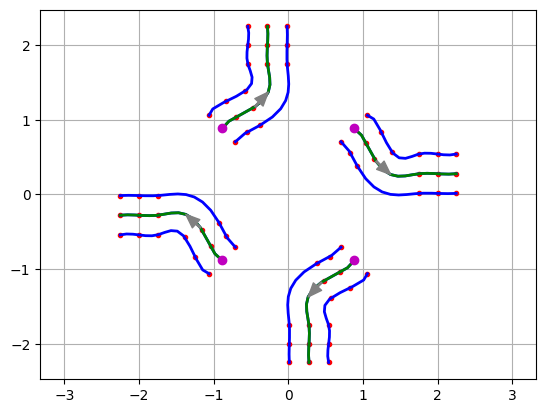

In [291]:
figNum=17
fig = plt.figure(figNum)
fig.clear()
plt.cla()

xFullnew,yFullnew=[],[]
xJoutFull,yJoutFull=[],[]
for j in range(3):
    xS,yS=xFull[j],yFull[j]

    if j==0:
        xFullnew,yFullnew=xS,yS
    else:
        xFullnew=np.vstack([xFullnew,xS])
        yFullnew=np.vstack([yFullnew,yS])
    
    fcF = lambda x,y: interpolate.interp1d(x, y,kind='cubic') 
    xd= [np.linspace(np.min(x),np.max(x),15) for x,y in zip(xS,yS)]
    yd= [np.linspace(np.min(y),np.max(y),15) for x,y in zip(xS,yS)]

    xJout,yJout=[],[]
    for i in range(4):
        if i % 2 ==0:
            xJout.append(xd[i]),yJout.append(fcF(xS[i],yS[i])(xd[i]))
        else:
            xJout.append(fcF(yS[i],xS[i])(yd[i])),yJout.append(yd[i])
    
    xJout_np,yJout_np=np.array(xJout),np.array(yJout)
    if j==0:
        xJoutFull,yJoutFull=xJout_np,yJout_np
    else:
        xJoutFull=np.vstack([xJoutFull,xJout_np])
        yJoutFull=np.vstack([yJoutFull,yJout_np])

key=np.where(np.abs(xFullnew[:,0]-xJoutFull[:,0])>0)[0]
xJoutFull[key,:]=np.fliplr(xJoutFull[key,:])
yJoutFull[key,:]=np.fliplr(yJoutFull[key,:])

plt.plot(xFullnew.T,yFullnew.T,'r.',linewidth=2)
plt.plot(xJoutFull.T,yJoutFull.T,'b-',linewidth=2)

st,ed=3,5 # arrow start & end point
step=range(4,8) # 0-3 bottom line; 4-8 center line; 9-12 top line; 
for j in range(4):
    plt.plot(xJoutFull[step[j]],yJoutFull[step[j]],'g-',linewidth=2)
    x,y=xJoutFull[step[j]],yJoutFull[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=8, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

In [283]:
np.shape(xFullnew)
xFullnew[:,0]

array([ 0.70710678, -0.70710678, -0.70710678,  0.70710678,  0.88388348,
       -0.88388348, -0.88388348,  0.88388348,  1.06066017, -1.06066017,
       -1.06066017,  1.06066017])

In [284]:
np.shape(xJoutFull)
xJoutFull[:,0]

array([ 0.70710678, -0.70710678, -2.25      ,  0.01463177,  0.88388348,
       -0.88388348, -2.25      ,  0.27800371,  1.06066017, -1.06066017,
       -2.25      ,  0.54137564])

In [289]:
key=np.where(np.abs(xFullnew[:,0]-xJoutFull[:,0])>0)[0]
key

array([ 2,  3,  6,  7, 10, 11])

In [137]:
listTmp=list(range(5))
display(listTmp)
display(listTmp[::-1])

[0, 1, 2, 3, 4]

[4, 3, 2, 1, 0]

In [171]:
arcKey=np.tile(C0+2,[pBase,1]).T+np.tile(range(pBase),[len(C0),1])
display(32-arcKey)
arcKey2=np.fliplr(32-arcKey)
display(arcKey2)

array([[30, 29, 28],
       [22, 21, 20],
       [14, 13, 12],
       [ 6,  5,  4]])

array([[28, 29, 30],
       [20, 21, 22],
       [12, 13, 14],
       [ 4,  5,  6]])

In [187]:
s=list(range(8))
display(s[4:])
display(s[-1:3:-1])

[4, 5, 6, 7]

[7, 6, 5, 4]

In [251]:
arcKey2


array([[ 6,  5,  4],
       [14, 13, 12],
       [22, 21, 20],
       [30, 29, 28]])

In [258]:
arcKey2=np.flipud(32-arcKey)
display(arcKey2)
arcKey3=np.roll(arcKey2,1,axis=0)
arcKey3

array([[ 6,  5,  4],
       [14, 13, 12],
       [22, 21, 20],
       [30, 29, 28]])

array([[30, 29, 28],
       [ 6,  5,  4],
       [14, 13, 12],
       [22, 21, 20]])

In [259]:
pBase=3
arcKey=np.tile(C0+2,[pBase,1]).T+np.tile(range(pBase),[len(C0),1])
arcKey2=np.flipud(32-arcKey)
arcKey3=np.roll(arcKey2,1,axis=0)

xFullrev=[np.hstack([np.fliplr(xD2rS[i][4:,:pBase]),xD.T[i,arcKey3]]) for i in range(3)]
yFullrev=[np.hstack([np.fliplr(yD2rS[i][4:,:pBase]),yD.T[i,arcKey3]]) for i in range(3)]


In [241]:
xD2rS[i][4:,:pBase]

array([[ 1.75      ,  2.        ,  2.25      ],
       [ 0.54137564,  0.54137564,  0.54137564],
       [-1.75      , -2.        , -2.25      ],
       [-0.54137564, -0.54137564, -0.54137564]])

In [211]:
np.shape(xD2rS)


(3, 8, 14)

In [209]:
i=2
[3-i-1 for i in range(3)]

[2, 1, 0]

In [210]:
[3-i-1 for i in range(1)]

[2]

In [204]:
np.shape(xD2rS)

(3, 8, 14)

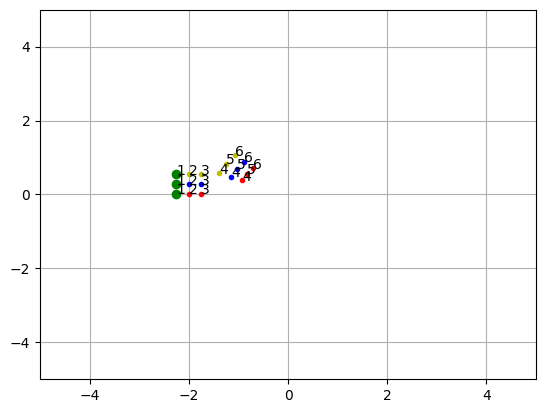

In [262]:
figNum=18
fig = plt.figure(figNum)
fig.clear()
plt.cla()

j=2
i=0
plt.plot(xFullrev[i][j,:],yFullrev[i][j,:],'r.',linewidth=2)
plt.plot(xFullrev[i][j,0],yFullrev[i][j,0],'g.',markersize=12)

idn=1
for x,y in zip(xFullrev[i][j,:],yFullrev[i][j,:]):
    plt.text(x,y,str(idn))
    idn=idn+1

i=1
plt.plot(xFullrev[i][j,:],yFullrev[i][j,:],'b.',linewidth=2)
plt.plot(xFullrev[i][j,0],yFullrev[i][j,0],'g.',markersize=12)

idn=1
for x,y in zip(xFullrev[i][j,:],yFullrev[i][j,:]):
    plt.text(x,y,str(idn))
    idn=idn+1

i=2
plt.plot(xFullrev[i][j,:],yFullrev[i][j,:],'y.',linewidth=2)
plt.plot(xFullrev[i][j,0],yFullrev[i][j,0],'g.',markersize=12)

idn=1
for x,y in zip(xFullrev[i][j,:],yFullrev[i][j,:]):
    plt.text(x,y,str(idn))
    idn=idn+1
    
# plt.plot(xFull[0].T,yFull[0].T,'b.',linewidth=2)
# plt.plot(xFull[1].T,yFull[1].T,'b.',linewidth=2)
# plt.axis('equal')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()


In [168]:
np.shape(xD2rS)

(3, 8, 14)

In [152]:
arcKey2

array([[28, 29, 30],
       [20, 21, 22],
       [12, 13, 14],
       [ 4,  5,  6]])

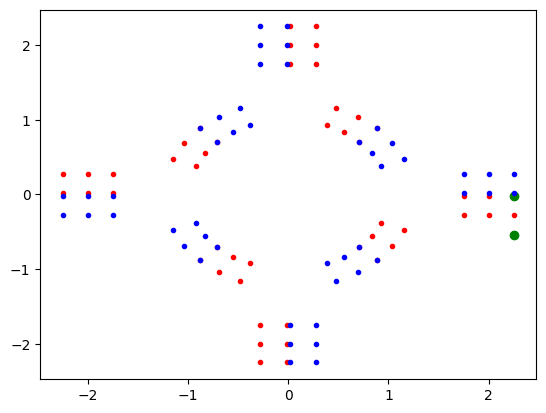

In [264]:
figNum=19
fig = plt.figure(figNum)
fig.clear()
plt.cla()

plt.plot(xFullrev[0],yFullrev[0],'r.',linewidth=2)
plt.plot(xFullrev[1],yFullrev[1],'r.',linewidth=2)
plt.plot(xFullrev[0][0,0],yFullrev[0][0,0],'g.',markersize=12)
plt.plot(xFullrev[2][0,0],yFullrev[2][0,0],'g.',markersize=12)


plt.plot(xFull[0].T,yFull[0].T,'b.',linewidth=2)
plt.plot(xFull[1].T,yFull[1].T,'b.',linewidth=2)


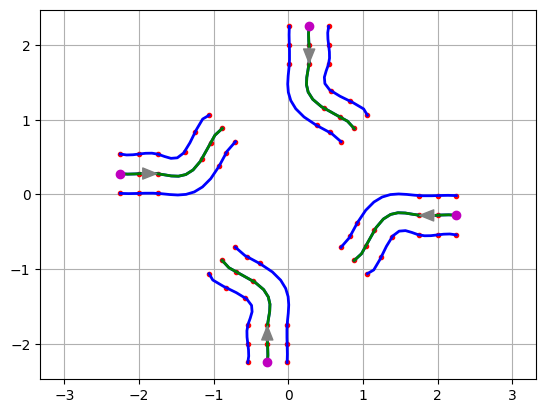

In [294]:
figNum=20
fig = plt.figure(figNum)
fig.clear()
plt.cla()

xFullnew_rev,yFullnew_rev=[],[]
xJoutFull_rev,yJoutFull_rev=[],[]
for j in range(3):
    xS,yS=xFullrev[j],yFullrev[j]

    if j==0:
        xFullnew_rev,yFullnew_rev=xS,yS
    else:
        xFullnew_rev=np.vstack([xFullnew_rev,xS])
        yFullnew_rev=np.vstack([yFullnew_rev,yS])
    
    fcF = lambda x,y: interpolate.interp1d(x, y,kind='cubic') 
    xd= [np.linspace(np.min(x),np.max(x),15) for x,y in zip(xS,yS)]
    yd= [np.linspace(np.min(y),np.max(y),15) for x,y in zip(xS,yS)]

    xJout,yJout=[],[]
    for i in range(4):
        if i % 2 ==0:
            xJout.append(xd[i]),yJout.append(fcF(xS[i],yS[i])(xd[i]))
        else:
            xJout.append(fcF(yS[i],xS[i])(yd[i])),yJout.append(yd[i])
    
    xJout_np,yJout_np=np.array(xJout),np.array(yJout)
    if j==0:
        xJoutFull_rev,yJoutFull_rev=xJout_np,yJout_np
    else:
        xJoutFull_rev=np.vstack([xJoutFull_rev,xJout_np])
        yJoutFull_rev=np.vstack([yJoutFull_rev,yJout_np])

key=np.where(np.abs(xFullnew_rev[:,0]-xJoutFull_rev[:,0])>0)[0]
xJoutFull_rev[key,:]=np.fliplr(xJoutFull_rev[key,:])
yJoutFull_rev[key,:]=np.fliplr(yJoutFull_rev[key,:])

plt.plot(xFullnew_rev.T,yFullnew_rev.T,'r.',linewidth=2)
plt.plot(xJoutFull_rev.T,yJoutFull_rev.T,'b-',linewidth=2)

st,ed=3,5 # arrow start & end point
step=range(4,8) # 0-3 bottom line; 4-8 center line; 9-12 top line; 
for j in range(4):
    plt.plot(xJoutFull_rev[step[j]],yJoutFull_rev[step[j]],'g-',linewidth=2)
    x,y=xJoutFull_rev[step[j]],yJoutFull_rev[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=8, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

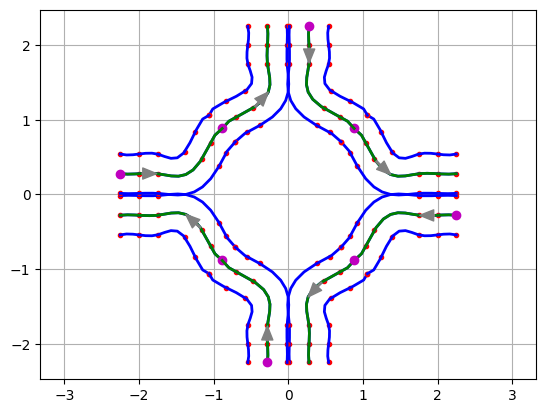

In [295]:
figNum=21
fig = plt.figure(figNum)
fig.clear()
plt.cla()

plt.plot(xFullnew.T,yFullnew.T,'r.',linewidth=2)
plt.plot(xJoutFull.T,yJoutFull.T,'b-',linewidth=2)

plt.plot(xFullnew_rev.T,yFullnew_rev.T,'r.',linewidth=2)
plt.plot(xJoutFull_rev.T,yJoutFull_rev.T,'b-',linewidth=2)

st,ed=3,5 # arrow start & end point
step=range(4,8) # 0-3 bottom line; 4-8 center line; 9-12 top line; 
for j in range(4):
    plt.plot(xJoutFull[step[j]],yJoutFull[step[j]],'g-',linewidth=2)
    x,y=xJoutFull[step[j]],yJoutFull[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=8, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))

    plt.plot(xJoutFull_rev[step[j]],yJoutFull_rev[step[j]],'g-',linewidth=2)
    x,y=xJoutFull_rev[step[j]],yJoutFull_rev[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=8, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

In [311]:
cBase=6
arcKey=np.tile(C0+5,[cBase,1]).T+np.tile(range(cBase),[len(C0),1])
arcKey2=np.fliplr(np.roll(arcKey % 32,1, axis=0))

xFullcent=[xD.T[i,arcKey2] for i in range(3)]
yFullcent=[yD.T[i,arcKey2] for i in range(3)]


In [296]:
C0

array([ 0,  8, 16, 24])

In [305]:
arcKey2

array([[29, 30, 31,  0,  1,  2],
       [ 5,  6,  7,  8,  9, 10],
       [13, 14, 15, 16, 17, 18],
       [21, 22, 23, 24, 25, 26]])

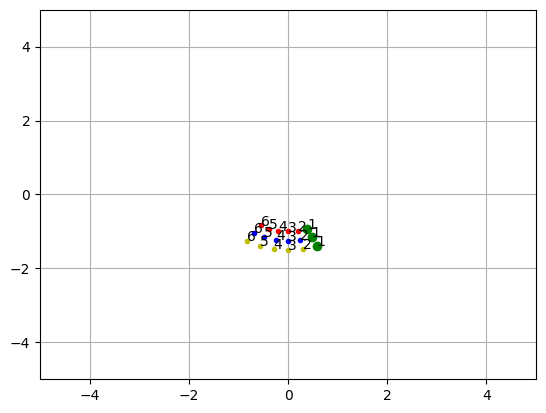

In [321]:
figNum=22
fig = plt.figure(figNum)
fig.clear()
plt.cla()

j=3
i=0
plt.plot(xFullcent[i][j,:],yFullcent[i][j,:],'r.',linewidth=2)
plt.plot(xFullcent[i][j,0],yFullcent[i][j,0],'g.',markersize=12)

idn=1
for x,y in zip(xFullcent[i][j,:],yFullcent[i][j,:]):
    plt.text(x,y,str(idn))
    idn=idn+1

i=1
plt.plot(xFullcent[i][j,:],yFullcent[i][j,:],'b.',linewidth=2)
plt.plot(xFullcent[i][j,0],yFullcent[i][j,0],'g.',markersize=12)

idn=1
for x,y in zip(xFullcent[i][j,:],yFullcent[i][j,:]):
    plt.text(x,y,str(idn))
    idn=idn+1

i=2
plt.plot(xFullcent[i][j,:],yFullcent[i][j,:],'y.',linewidth=2)
plt.plot(xFullcent[i][j,0],yFullcent[i][j,0],'g.',markersize=12)

idn=1
for x,y in zip(xFullcent[i][j,:],yFullcent[i][j,:]):
    plt.text(x,y,str(idn))
    idn=idn+1
    
# plt.plot(xFull[0].T,yFull[0].T,'b.',linewidth=2)
# plt.plot(xFull[1].T,yFull[1].T,'b.',linewidth=2)
# plt.axis('equal')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()


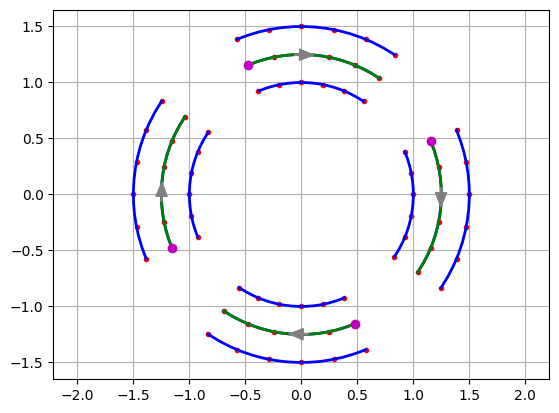

In [393]:
figNum=23
fig = plt.figure(figNum)
fig.clear()
plt.cla()

xFullnew_cent,yFullnew_cent=[],[]
xJoutFull_cent,yJoutFull_cent=[],[]
for j in range(3):
    xS,yS=xFullcent[j],yFullcent[j]

    if j==0:
        xFullnew_cent,yFullnew_cent=xS,yS
    else:
        xFullnew_cent=np.vstack([xFullnew_cent,xS])
        yFullnew_cent=np.vstack([yFullnew_cent,yS])
    
    fcF = lambda x,y: interpolate.interp1d(x, y,kind='cubic') 
    xd= [np.linspace(np.min(x),np.max(x),15) for x,y in zip(xS,yS)]
    yd= [np.linspace(np.min(y),np.max(y),15) for x,y in zip(xS,yS)]

    xJout,yJout=[],[]
    for i in range(4):
        if i % 2 ==1: # x-y relation changed
            xJout.append(xd[i]),yJout.append(fcF(xS[i],yS[i])(xd[i]))
        else:
            xJout.append(fcF(yS[i],xS[i])(yd[i])),yJout.append(yd[i])
    
    xJout_np,yJout_np=np.array(xJout),np.array(yJout)
    if j==0:
        xJoutFull_cent,yJoutFull_cent=xJout_np,yJout_np
    else:
        xJoutFull_cent=np.vstack([xJoutFull_cent,xJout_np])
        yJoutFull_cent=np.vstack([yJoutFull_cent,yJout_np])

key=np.where(np.abs(xFullnew_cent[:,0]-xJoutFull_cent[:,0])>0)[0]
xJoutFull_cent[key,:]=np.fliplr(xJoutFull_cent[key,:])
yJoutFull_cent[key,:]=np.fliplr(yJoutFull_cent[key,:])

plt.plot(xFullnew_cent.T,yFullnew_cent.T,'r.',linewidth=2)
plt.plot(xJoutFull_cent.T,yJoutFull_cent.T,'b-',linewidth=2)

st,ed=5,7 # arrow start & end point
step=range(4,8) # 0-3 bottom line; 4-8 center line; 9-12 top line; 
for j in range(4):
    plt.plot(xJoutFull_cent[step[j]],yJoutFull_cent[step[j]],'g-',linewidth=2)
    x,y=xJoutFull_cent[step[j]],yJoutFull_cent[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=8, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

In [ ]:
cBase=6
arcKey=np.tile(C0+5,[cBase,1]).T+np.tile(range(cBase),[len(C0),1])
arcKey2=np.fliplr(np.roll(arcKey % 32,1, axis=0))

xFullcent=[xD.T[i,arcKey2] for i in range(3)]
yFullcent=[yD.T[i,arcKey2] for i in range(3)]


In [399]:
pBase=2
p2Base=np.shape(xD2rS)[2]-pBase

xFullout=[xD2rS[i][:4,pBase:] for i in range(3)]
yFullout=[yD2rS[i][:4,pBase:] for i in range(3)]
xFullin=[np.fliplr(xD2rS[i][4:,pBase:]) for i in range(3)]
yFullin=[np.fliplr(yD2rS[i][4:,pBase:]) for i in range(3)]


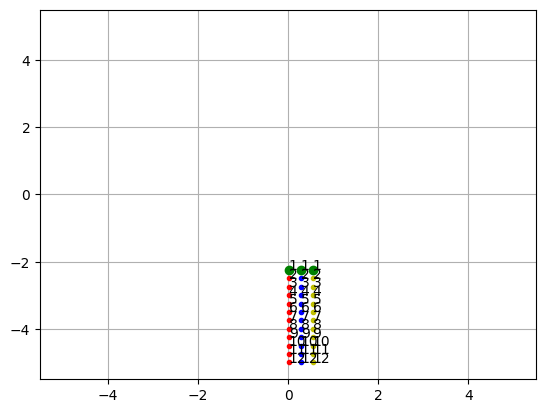

In [400]:
figNum=24
fig = plt.figure(figNum)
fig.clear()
plt.cla()

j=3
i=0
plt.plot(xFullout[i][j,:],yFullout[i][j,:],'r.',linewidth=2)
plt.plot(xFullout[i][j,0],yFullout[i][j,0],'g.',markersize=12)

idn=1
for x,y in zip(xFullout[i][j,:],yFullout[i][j,:]):
    plt.text(x,y,str(idn))
    idn=idn+1

i=1
plt.plot(xFullout[i][j,:],yFullout[i][j,:],'b.',linewidth=2)
plt.plot(xFullout[i][j,0],yFullout[i][j,0],'g.',markersize=12)

idn=1
for x,y in zip(xFullout[i][j,:],yFullout[i][j,:]):
    plt.text(x,y,str(idn))
    idn=idn+1

i=2
plt.plot(xFullout[i][j,:],yFullout[i][j,:],'y.',linewidth=2)
plt.plot(xFullout[i][j,0],yFullout[i][j,0],'g.',markersize=12)

idn=1
for x,y in zip(xFullout[i][j,:],yFullout[i][j,:]):
    plt.text(x,y,str(idn))
    idn=idn+1
    
# plt.plot(xFull[0].T,yFull[0].T,'b.',linewidth=2)
# plt.plot(xFull[1].T,yFull[1].T,'b.',linewidth=2)
# plt.axis('equal')
plt.xlim(-5.5,5.5)
plt.ylim(-5.5,5.5)
plt.grid()


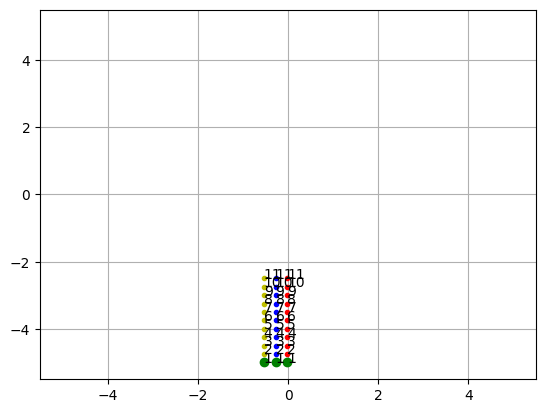

In [334]:
figNum=25
fig = plt.figure(figNum)
fig.clear()
plt.cla()

j=3
i=0
plt.plot(xFullin[i][j,:],yFullin[i][j,:],'r.',linewidth=2)
plt.plot(xFullin[i][j,0],yFullin[i][j,0],'g.',markersize=12)

idn=1
for x,y in zip(xFullin[i][j,:],yFullin[i][j,:]):
    plt.text(x,y,str(idn))
    idn=idn+1

i=1
plt.plot(xFullin[i][j,:],yFullin[i][j,:],'b.',linewidth=2)
plt.plot(xFullin[i][j,0],yFullin[i][j,0],'g.',markersize=12)

idn=1
for x,y in zip(xFullin[i][j,:],yFullin[i][j,:]):
    plt.text(x,y,str(idn))
    idn=idn+1

i=2
plt.plot(xFullin[i][j,:],yFullin[i][j,:],'y.',linewidth=2)
plt.plot(xFullin[i][j,0],yFullin[i][j,0],'g.',markersize=12)

idn=1
for x,y in zip(xFullin[i][j,:],yFullin[i][j,:]):
    plt.text(x,y,str(idn))
    idn=idn+1
    
# plt.plot(xFull[0].T,yFull[0].T,'b.',linewidth=2)
# plt.plot(xFull[1].T,yFull[1].T,'b.',linewidth=2)
# plt.axis('equal')
plt.xlim(-5.5,5.5)
plt.ylim(-5.5,5.5)
plt.grid()



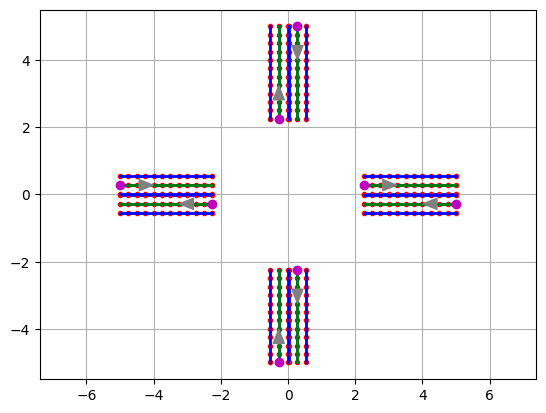

In [401]:
figNum=26
fig = plt.figure(figNum)
fig.clear()
plt.cla()

xFullnew_out,yFullnew_out=[],[]
xJoutFull_out,yJoutFull_out=[],[]
xFullnew_in,yFullnew_in=[],[]
xJoutFull_in,yJoutFull_in=[],[]

for j in range(3):
    xS1,yS1=xFullout[j],yFullout[j]
    xS2,yS2=xFullin[j],yFullin[j]

    if j==0:
        xFullnew_out,yFullnew_out=xS1,yS1
        xFullnew_in,yFullnew_in=xS2,yS2
    else:
        xFullnew_out=np.vstack([xFullnew_out,xS1])
        yFullnew_out=np.vstack([yFullnew_out,yS1])
        xFullnew_in=np.vstack([xFullnew_in,xS2])
        yFullnew_in=np.vstack([yFullnew_in,yS2])
     
    fcF = lambda x,y: interpolate.interp1d(x, y,kind='cubic') 
    xd1= [np.linspace(np.min(x),np.max(x),15) for x,y in zip(xS1,yS1)]
    yd1= [np.linspace(np.min(y),np.max(y),15) for x,y in zip(xS1,yS1)]
    xd2= [np.linspace(np.min(x),np.max(x),15) for x,y in zip(xS2,yS2)]
    yd2= [np.linspace(np.min(y),np.max(y),15) for x,y in zip(xS2,yS2)]

    xJout1,yJout1=[],[]
    xJout2,yJout2=[],[]
    for i in range(4):
        if i % 2 ==0:  
            xJout1.append(xd1[i]),yJout1.append(fcF(xS1[i],yS1[i])(xd1[i]))
            xJout2.append(xd2[i]),yJout2.append(fcF(xS2[i],yS2[i])(xd2[i]))
        else:
            xJout1.append(fcF(yS1[i],xS1[i])(yd1[i])),yJout1.append(yd1[i])
            xJout2.append(fcF(yS2[i],xS2[i])(yd2[i])),yJout2.append(yd2[i])
    
    xJout_np1,yJout_np1=np.array(xJout1),np.array(yJout1)
    xJout_np2,yJout_np2=np.array(xJout2),np.array(yJout2)
    if j==0:
        xJoutFull_out,yJoutFull_out=xJout_np1,yJout_np1
        xJoutFull_in,yJoutFull_in=xJout_np2,yJout_np2
    else:
        xJoutFull_out=np.vstack([xJoutFull_out,xJout_np1])
        yJoutFull_out=np.vstack([yJoutFull_out,yJout_np1])
        xJoutFull_in=np.vstack([xJoutFull_in,xJout_np2])
        yJoutFull_in=np.vstack([yJoutFull_in,yJout_np2])


key=np.where(np.abs(xFullnew_out[:,0]-xJoutFull_out[:,0])>0)[0]
xJoutFull_out[key,:]=np.fliplr(xJoutFull_out[key,:])
yJoutFull_out[key,:]=np.fliplr(yJoutFull_out[key,:])

key=np.where(np.abs(xFullnew_in[:,0]-xJoutFull_in[:,0])>0)[0]
xJoutFull_in[key,:]=np.fliplr(xJoutFull_in[key,:])
yJoutFull_in[key,:]=np.fliplr(yJoutFull_in[key,:])

plt.plot(xFullnew_out.T,yFullnew_out.T,'r.',linewidth=2)
plt.plot(xJoutFull_out.T,yJoutFull_out.T,'b-',linewidth=2)

plt.plot(xFullnew_in.T,yFullnew_in.T,'r.',linewidth=2)
plt.plot(xJoutFull_in.T,yJoutFull_in.T,'b-',linewidth=2)

st,ed=3,5 # arrow start & end point
step=range(4,8) # 0-3 bottom line; 4-8 center line; 9-12 top line; 
for j in range(4):
    plt.plot(xJoutFull_out[step[j]],yJoutFull_out[step[j]],'g-',linewidth=2)
    plt.plot(xJoutFull_in[step[j]],yJoutFull_in[step[j]],'g-',linewidth=2)

    x,y=xJoutFull_out[step[j]],yJoutFull_out[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=8, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))

    x,y=xJoutFull_in[step[j]],yJoutFull_in[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=8, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

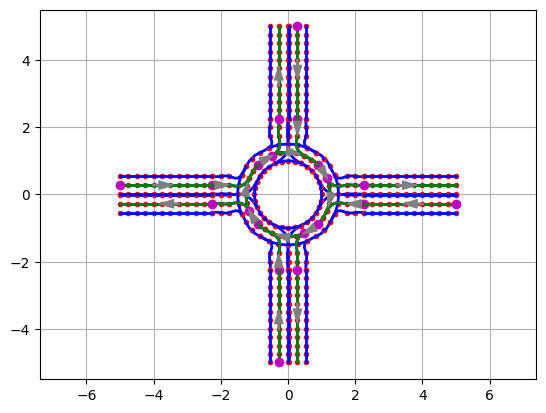

In [402]:
figNum=27
fig = plt.figure(figNum)
fig.clear()
plt.cla()

plt.plot(xFullnew.T,yFullnew.T,'r.',linewidth=2)
plt.plot(xJoutFull.T,yJoutFull.T,'b-',linewidth=2)

plt.plot(xFullnew_rev.T,yFullnew_rev.T,'r.',linewidth=2)
plt.plot(xJoutFull_rev.T,yJoutFull_rev.T,'b-',linewidth=2)

plt.plot(xFullnew_cent.T,yFullnew_cent.T,'r.',linewidth=2)
plt.plot(xJoutFull_cent.T,yJoutFull_cent.T,'b-',linewidth=2)

plt.plot(xFullnew_out.T,yFullnew_out.T,'r.',linewidth=2)
plt.plot(xJoutFull_out.T,yJoutFull_out.T,'b-',linewidth=2)

plt.plot(xFullnew_in.T,yFullnew_in.T,'r.',linewidth=2)
plt.plot(xJoutFull_in.T,yJoutFull_in.T,'b-',linewidth=2)

# st,ed=3,5 # arrow start & end point
step=range(4,8) # 0-3 bottom line; 4-8 center line; 9-12 top line; 
for j in range(4):
    st,ed=1,3
    plt.plot(xJoutFull[step[j]],yJoutFull[step[j]],'g-',linewidth=2)
    x,y=xJoutFull[step[j]],yJoutFull[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=6, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))
    st,ed=3,5
    plt.plot(xJoutFull_rev[step[j]],yJoutFull_rev[step[j]],'g-',linewidth=2)
    x,y=xJoutFull_rev[step[j]],yJoutFull_rev[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=6, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))
    st,ed=8,10
    plt.plot(xJoutFull_cent[step[j]],yJoutFull_cent[step[j]],'g-',linewidth=2)
    x,y=xJoutFull_cent[step[j]],yJoutFull_cent[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=6, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))
    st,ed=5,8
    plt.plot(xJoutFull_out[step[j]],yJoutFull_out[step[j]],'g-',linewidth=2)
    x,y=xJoutFull_out[step[j]],yJoutFull_out[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=6, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))
    st,ed=5,8
    plt.plot(xJoutFull_in[step[j]],yJoutFull_in[step[j]],'g-',linewidth=2)
    x,y=xJoutFull_in[step[j]],yJoutFull_in[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=6, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

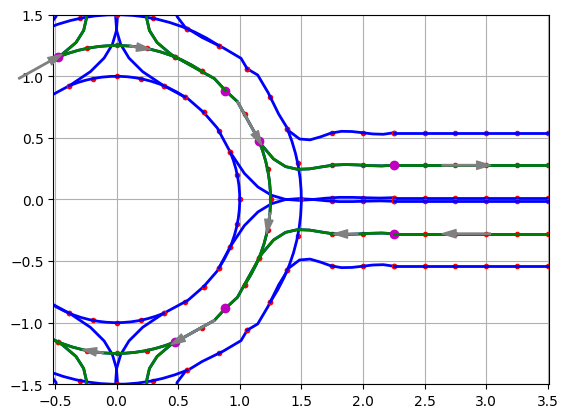

In [408]:
figNum=27
fig = plt.figure(figNum)
fig.clear()
plt.cla()

plt.plot(xFullnew.T,yFullnew.T,'r.',linewidth=2)
plt.plot(xJoutFull.T,yJoutFull.T,'b-',linewidth=2)

plt.plot(xFullnew_rev.T,yFullnew_rev.T,'r.',linewidth=2)
plt.plot(xJoutFull_rev.T,yJoutFull_rev.T,'b-',linewidth=2)

plt.plot(xFullnew_cent.T,yFullnew_cent.T,'r.',linewidth=2)
plt.plot(xJoutFull_cent.T,yJoutFull_cent.T,'b-',linewidth=2)

plt.plot(xFullnew_out.T,yFullnew_out.T,'r.',linewidth=2)
plt.plot(xJoutFull_out.T,yJoutFull_out.T,'b-',linewidth=2)

plt.plot(xFullnew_in.T,yFullnew_in.T,'r.',linewidth=2)
plt.plot(xJoutFull_in.T,yJoutFull_in.T,'b-',linewidth=2)

# st,ed=3,5 # arrow start & end point
step=range(4,8) # 0-3 bottom line; 4-8 center line; 9-12 top line; 
for j in range(4):
    st,ed=1,3
    plt.plot(xJoutFull[step[j]],yJoutFull[step[j]],'g-',linewidth=2)
    x,y=xJoutFull[step[j]],yJoutFull[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=6, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))
    st,ed=3,5
    plt.plot(xJoutFull_rev[step[j]],yJoutFull_rev[step[j]],'g-',linewidth=2)
    x,y=xJoutFull_rev[step[j]],yJoutFull_rev[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=6, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))
    st,ed=7,9
    plt.plot(xJoutFull_cent[step[j]],yJoutFull_cent[step[j]],'g-',linewidth=2)
    x,y=xJoutFull_cent[step[j]],yJoutFull_cent[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=6, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))
    st,ed=2,4
    plt.plot(xJoutFull_out[step[j]],yJoutFull_out[step[j]],'g-',linewidth=2)
    x,y=xJoutFull_out[step[j]],yJoutFull_out[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=6, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))
    st,ed=10,12
    plt.plot(xJoutFull_in[step[j]],yJoutFull_in[step[j]],'g-',linewidth=2)
    x,y=xJoutFull_in[step[j]],yJoutFull_in[step[j]]
    plt.plot(x[0],y[0],'m.',markersize=12)
    plt.annotate('', xy=[x[ed],y[ed]],xytext=[x[st],y[st]],
                arrowprops=dict(shrink=0, width=1, headwidth=6, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='gray', edgecolor='gray'))

plt.grid()
plt.axis('equal')
plt.xlim(0,3)
plt.ylim(-1.5,1.5)

plt.show()